ACTIVIDAD 1 -Sugeno-
Cargar el conjunto de datos de alguna de las señales de VDA que se ofrecen a continuación y graficarlo.
Entrenar diferentes modelos de Sugeno con todos ellos, variando la cantidad de reglas R (O el parámetro de radio de vecindad del clustering sustractivo, si corresponde). Graficar el error cuadrático medio (MSE) vs. R.
Elegir uno de los modelos según la mejor relación entre R y el MSE obtenido.
Sobremuestrear la señal, barriendo la variable de entrada para tener muchos más valores de muestras que con los datos originales y utilizando el modelo de Sugeno seleccionado.

Nota: Las señales de Variación de Diámetro Arterial fueron muestreadas con una frecuencia de 400 Hz. Es posible graduar así un eje temporal en segundos. El intervalo entre muestras sería de 1/400 s = 2.5ms.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans

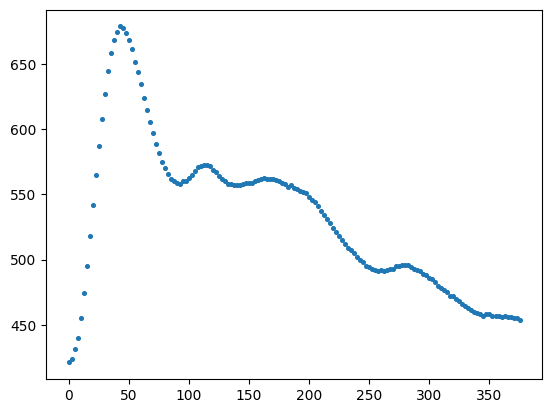

In [4]:
vda  = np.loadtxt('samplesVDA1.txt',int)
cant_datos = vda.shape[0]
medidas_x_segundo = 400
npyarray=np.array
tiempo = np.arange(0,cant_datos/400,1/medidas_x_segundo)
tiempo = tiempo*1000
vda = vda.reshape(-1,1)
tiempo = tiempo.reshape(-1,1)
data = np.hstack((tiempo,vda))
data
plt.scatter(data[:,0],data[:,1],s=7)

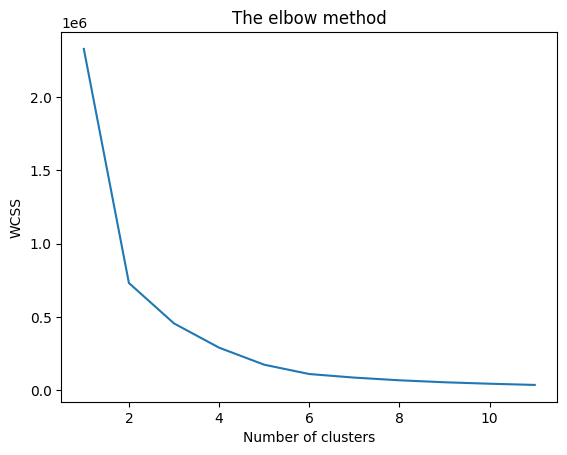

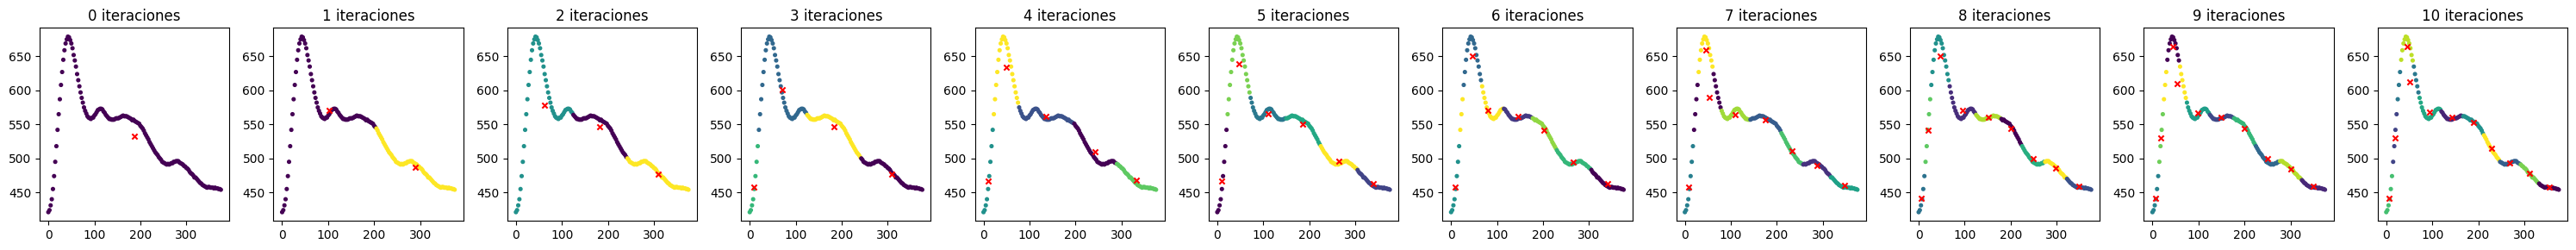

In [5]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
array_etiquetas= []
array_centroides = []
wcss = []
cant_clusters = range(1, 12)
for i in cant_clusters:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    array_etiquetas.append(kmeans.labels_)
    array_centroides.append(kmeans.cluster_centers_)
    wcss.append(kmeans.inertia_)

plt.plot(cant_clusters, wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


plots = len(cant_clusters)
columnas = plots

fig, axs = plt.subplots(1, columnas,figsize=(30, 3))

for i in range(columnas):
    axs[i].scatter(data[:, 0], data[:, 1], c=array_etiquetas[i], cmap='viridis', s = 7)
    axs[i].scatter(array_centroides[i][:, 0], array_centroides[i][:, 1], c='red', marker='x', s=20)
    axs[i].set_title(f'{i} iteraciones')
    
plt.tight_layout()
plt.show()
    

#Duda
Porque los centroides salen al reves?? puse la cantidad de iteraciones en 15 y rotaban el orden de axis

# ======== Duda ========
 * Podemos hacer copy paste del codigo? *

 * clustering con otro metodo? tiene mas sentido?* 

 * Como ploteo mejor esto? *

 * Steps de clusteirng con sklearn *  

 * si normalizamos cambia el grafico? * 

 * podemos tomar aunque el cluster tome de los 2 lados? * 
 

In [6]:
"""Subtractive Clustering Algorithm"""

def subclust3(data, Ra, Rb, AcceptRatio=0.3, RejectRatio=0.1):
    if Rb==0:
        Rb = Ra*1.15
        
    scaler = MinMaxScaler()
    scaler.fit(data) 
    ndata = scaler.transform(data)
    
    # 14/05/2020 cambio list comprehensions por distance matrix
    #P = np.array([np.sum([np.exp(-(np.linalg.norm(u-v)**2)/(Ra/2)**2) for v in ndata]) for u in ndata])
    #print(P)
    P = distance_matrix(ndata,ndata)
    alpha=(Ra/2)**2
    P = np.sum(np.exp(-P**2/alpha),axis=0)
   
    centers = []
    i=np.argmax(P)
    C = ndata[i]
    p=P[i]
    centers = [C]
    
    continuar=True
    restarP = True
    while continuar:
        pAnt = p
        if restarP:
            P=P-p*np.array([np.exp(-np.linalg.norm(v-C)**2/(Rb/2)**2) for v in ndata])            
        restarP = True  
        i=np.argmax(P)
        C = ndata[i]
        p=P[i]
        if p>AcceptRatio*pAnt:
            centers = np.vstack((centers,C))
        elif p<RejectRatio*pAnt:
            continuar=False
        else: 
            dr = np.min([np.linalg.norm(v-C) for v in centers])
            if dr/Ra+p/pAnt>=1:
                centers = np.vstack((centers,C))
            else:
                P[i]=0
                restarP = False
        if not any(v>0 for v in P):
            continuar = False
    distancias = [[np.linalg.norm(p-c) for p in ndata] for c in centers]
    labels = np.argmin(distancias, axis=0)
    centers = scaler.inverse_transform(centers)
    return labels, centers

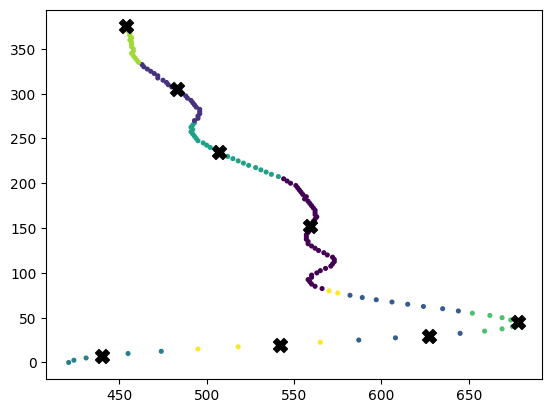

In [7]:

r,c = subclust3(data,0.5,0)
plt.figure()
plt.scatter(data[:,1],data[:,0], c=r, s=7)
plt.scatter(c[:,1],c[:,0], marker='X',s=100,c="black")
plt.show()

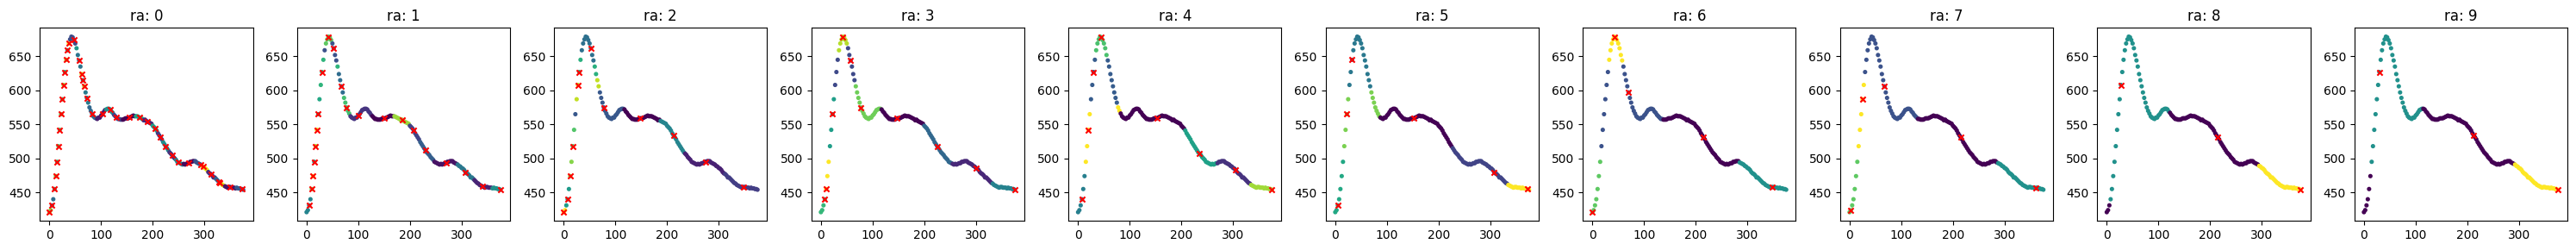

In [8]:
array_etiquetas= []
array_centroides = []
wcss = []
cant_clusters = range(1, 11)
for i in cant_clusters:
    etiquetas, centroides = subclust3(data,i/10,0)
    array_etiquetas.append(etiquetas)
    array_centroides.append(centroides)

plots = len(cant_clusters)
columnas = plots

fig, axs = plt.subplots(1, columnas,figsize=(30, 3))

for i in range(columnas):
    axs[i].scatter(data[:, 0], data[:, 1], c=array_etiquetas[i], cmap='viridis', s = 7)
    axs[i].scatter(array_centroides[i][:, 0], array_centroides[i][:, 1], c='red', marker='x', s=20)
    axs[i].set_title(f'ra: {i}')
    
plt.tight_layout()
plt.show()
    

## Spectral Clustering

/home/tobias/facultad/2cuatri-cuarto/IA/.venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[7.27441374e-15 9.15860144e-07 1.27362218e-05]
not reaching the requested tolerance 2.250075340270996e-06.
Use iteration 1867 instead with accuracy 
1.4947503081088575e-06.

  _, diffusion_map = lobpcg(
/home/tobias/facultad/2cuatri-cuarto/IA/.venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.31811515e-14 9.20639289e-07 3.56361164e-06]
not reaching the requested tolerance 2.250075340270996e-06.
  _, diffusion_map = lobpcg(


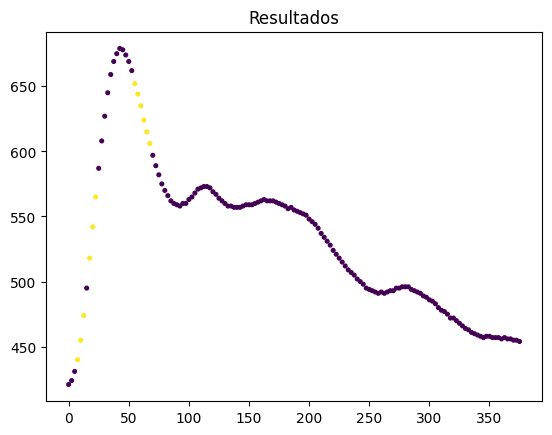

Silhouette Score: 0.22178999939887922
Calinski-Harabasz Score: 22.41370857207597
Davies-Bouldin Score: 1.0430049558514678


/home/tobias/facultad/2cuatri-cuarto/IA/.venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[7.81756045e-15 3.15291056e-07 3.57549960e-07 1.94664438e-05]
not reaching the requested tolerance 2.250075340270996e-06.
Use iteration 1924 instead with accuracy 
2.411786283143279e-06.

  _, diffusion_map = lobpcg(
/home/tobias/facultad/2cuatri-cuarto/IA/.venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[4.51296828e-15 3.17999718e-07 3.66315107e-07 8.96282984e-06]
not reaching the requested tolerance 2.250075340270996e-06.
  _, diffusion_map = lobpcg(


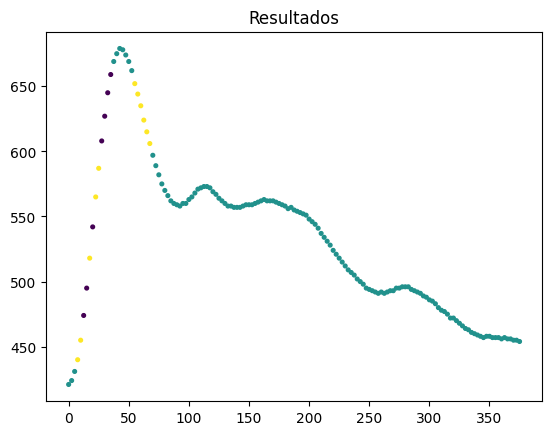

Silhouette Score: 0.20334241111137227
Calinski-Harabasz Score: 21.334238004913814
Davies-Bouldin Score: 5.579716779402489


/home/tobias/facultad/2cuatri-cuarto/IA/.venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited at iteration 2000 with accuracies 
[2.64085226e-11 5.09783155e-07 5.89994066e-07 9.47926550e-06
 2.83679762e-07]
not reaching the requested tolerance 2.250075340270996e-06.
Use iteration 1785 instead with accuracy 
9.106413444925757e-07.

  _, diffusion_map = lobpcg(
/home/tobias/facultad/2cuatri-cuarto/IA/.venv/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[2.80562189e-13 5.22987162e-07 6.03555150e-07 3.13576243e-06
 2.90878843e-07]
not reaching the requested tolerance 2.250075340270996e-06.
  _, diffusion_map = lobpcg(


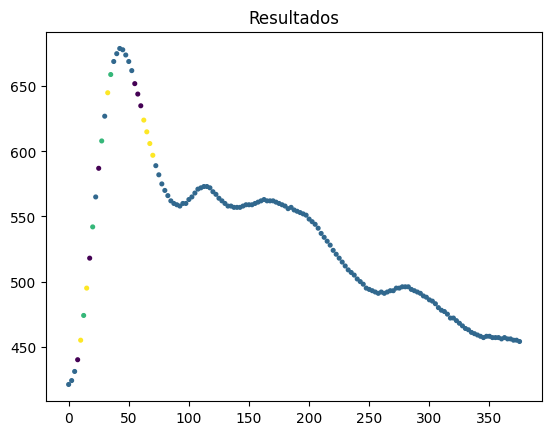

Silhouette Score: 0.1633662455584177
Calinski-Harabasz Score: 12.367447832241622
Davies-Bouldin Score: 9.51690081441442


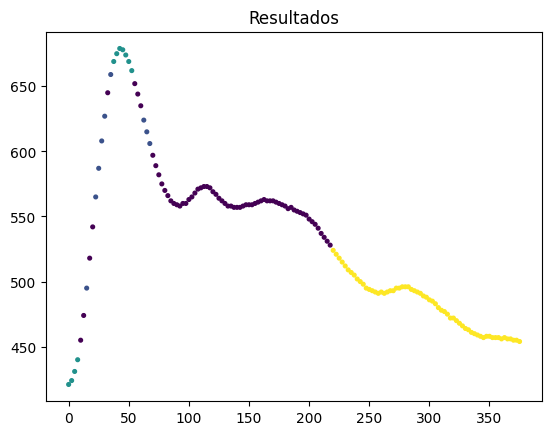

Silhouette Score: 0.4093808602227989
Calinski-Harabasz Score: 144.24765677624922
Davies-Bouldin Score: 5.050751492122715


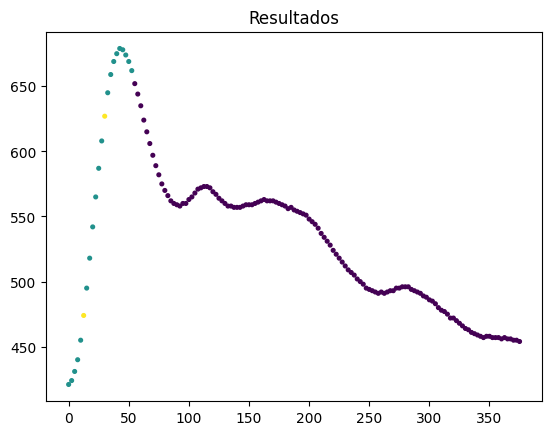

Silhouette Score: 0.276884315601227
Calinski-Harabasz Score: 32.686433314766056
Davies-Bouldin Score: 4.765199740662062


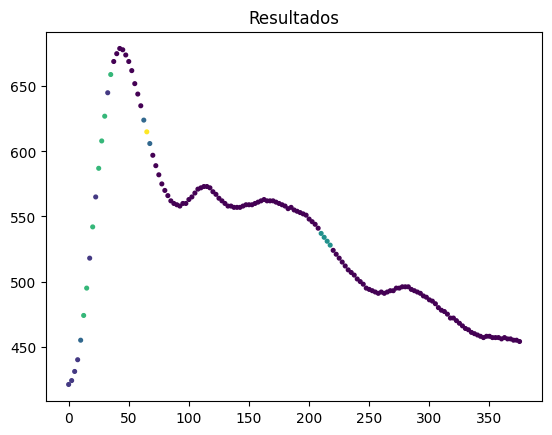

Silhouette Score: -0.3742357675372717
Calinski-Harabasz Score: 9.455647453229268
Davies-Bouldin Score: 9.588604189299154


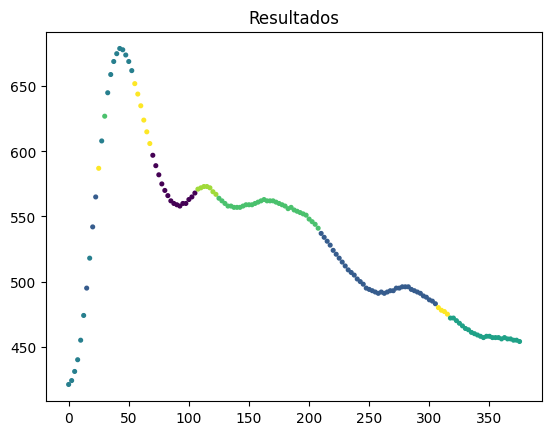

Silhouette Score: 0.25271410920611753
Calinski-Harabasz Score: 58.00854350877149
Davies-Bouldin Score: 4.20192151803616


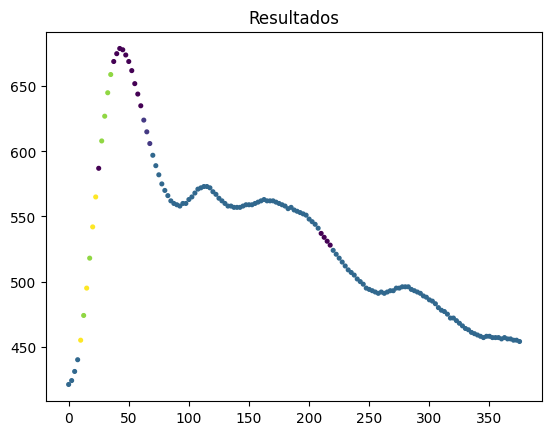

Silhouette Score: 0.09237772048025605
Calinski-Harabasz Score: 17.38451316336076
Davies-Bouldin Score: 2.212556732141725


In [10]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics
cant_clusters = range(2,10)
for cant in cant_clusters:
    spectral_clustering = SpectralClustering(cant, affinity ='rbf', n_init=100, assign_labels='discretize')
    spectral_clustering.fit(data)
    etiquetas = spectral_clustering.labels_
    plt.scatter(data[:, 0], data[:, 1], c=etiquetas, cmap='viridis', s = 7)
    plt.title('Resultados')
    plt.show()
    
    # Evaluación con métricas
    silhouette_score = metrics.silhouette_score(data, etiquetas, metric='euclidean')
    calinski_harabasz_score = metrics.calinski_harabasz_score(data, etiquetas)
    davies_bouldin_score = metrics.davies_bouldin_score(data, etiquetas)
    print("Silhouette Score:", silhouette_score)
    print("Calinski-Harabasz Score:", calinski_harabasz_score)
    print("Davies-Bouldin Score:", davies_bouldin_score)    